Import necessary packages

In [2]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import numpy as np
import os

sns.set()

saveext=".jpg"

try:
    os.mkdir("plots")
    os.mkdir("plots\Speeds")
except:
    pass

asocial_values = np.linspace(0.0, 1.0, num= 11)
roaddensities = np.arange(10, 310, 10)

Import data

In [3]:
speeds = {}

for density in roaddensities:
    speeds[density] = {}
    
    for j, asocialness in enumerate(asocial_values):
        speeds[density][asocialness] = pd.read_csv('speeds_%scars_%s_1000points.csv' % (density, asocialness))
        

Plot histogram of speeds with the same number of cars

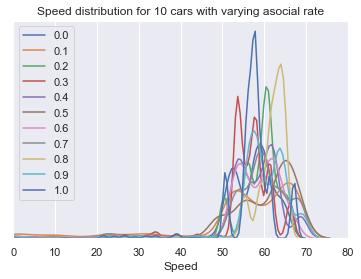

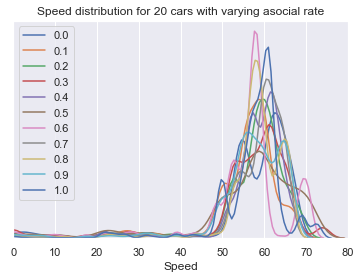

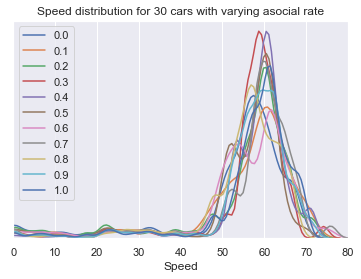

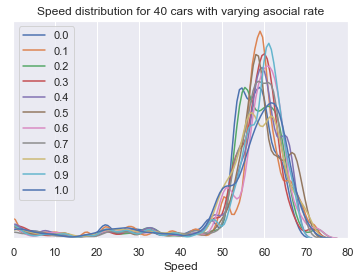

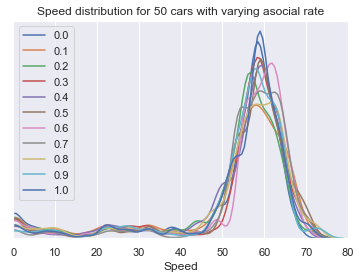

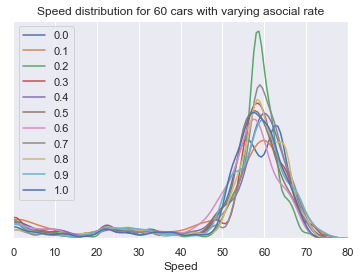

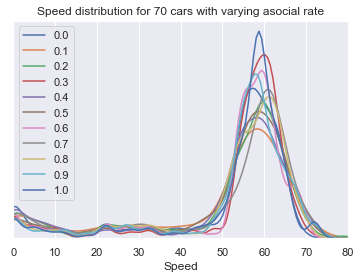

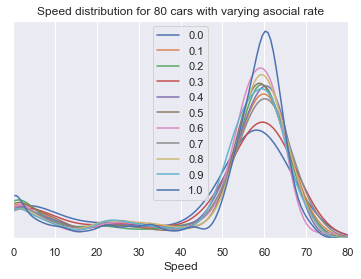

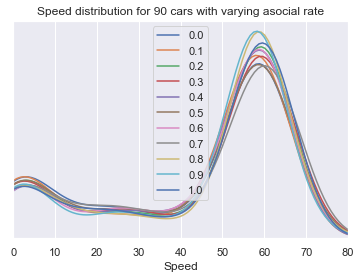

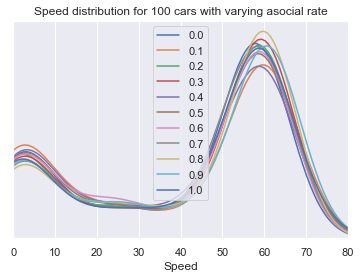

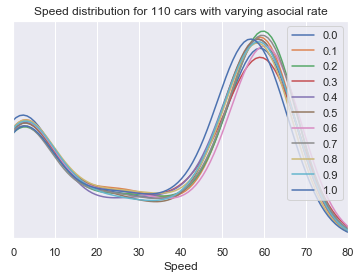

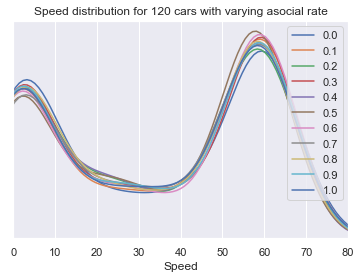

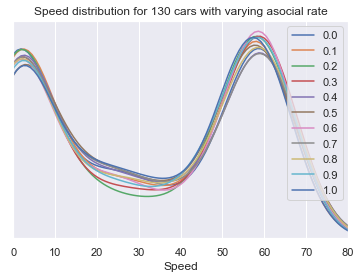

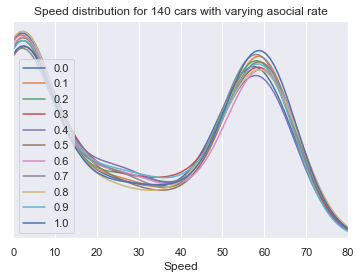

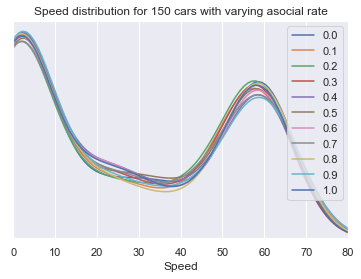

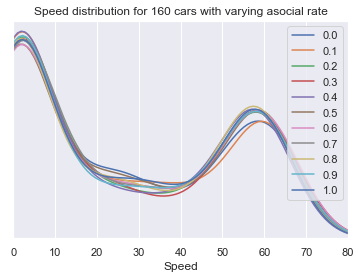

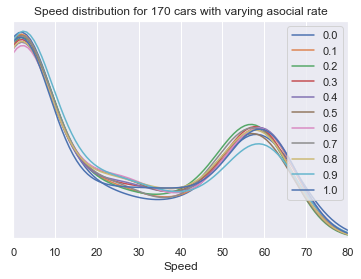

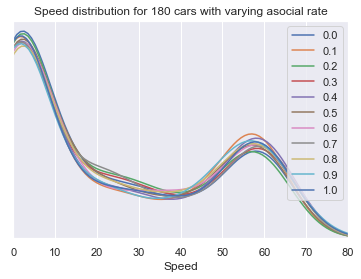

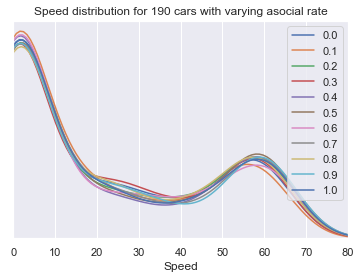

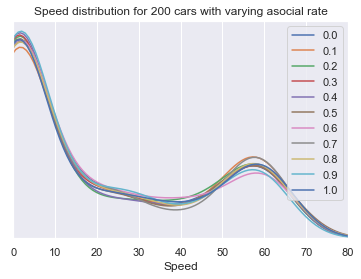

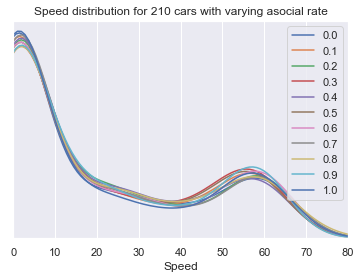

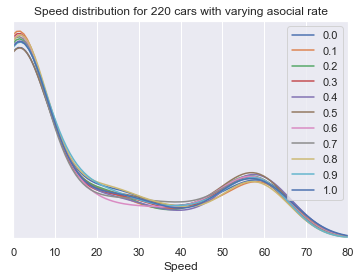

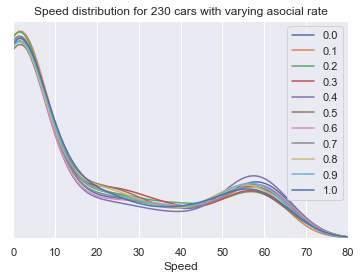

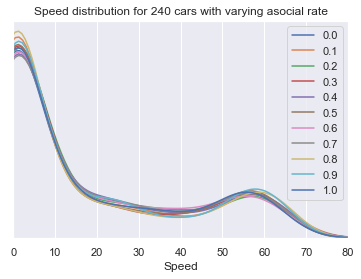

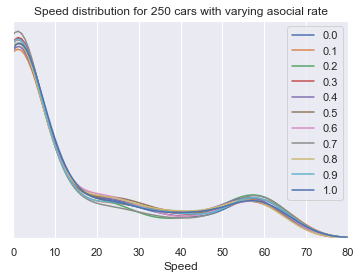

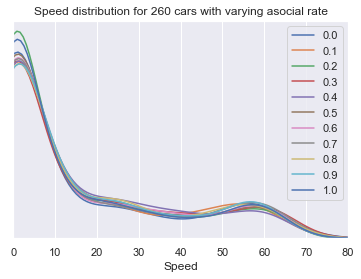

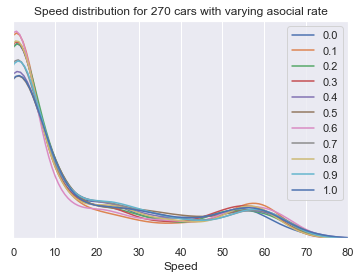

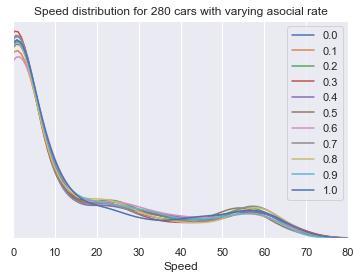

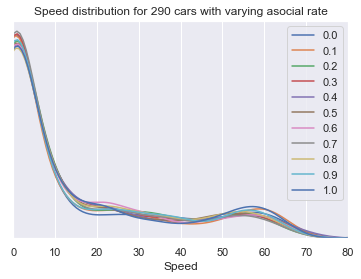

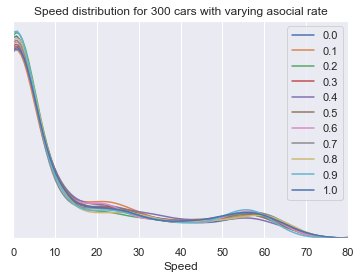

In [17]:
for density in roaddensities:
    for value in asocial_values:
        sns.distplot(speeds[density][value]['Speed'], hist = False, norm_hist = False, label = value)
        
    plt.title("Speed distribution for %s cars with varying asocial rate" % (density))
    plt.yticks([])
    plt.autoscale(axis = 'y')
    plt.ylim(ymin = 0)
    plt.xlim(xmin=0, xmax = 80)
    plt.legend()
    plt.savefig("plots\Speeds\speeds_%scars%s" % (density, saveext))
    plt.show()

Plot histogram of speeds with the same asocialness

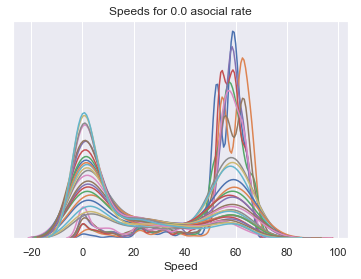

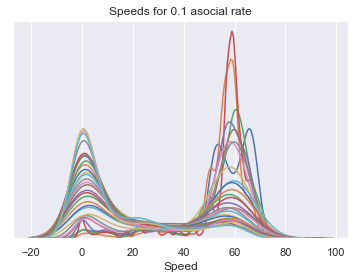

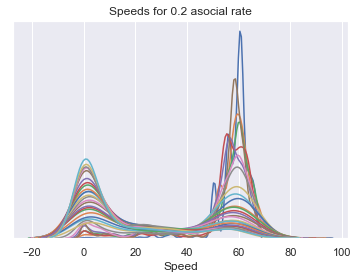

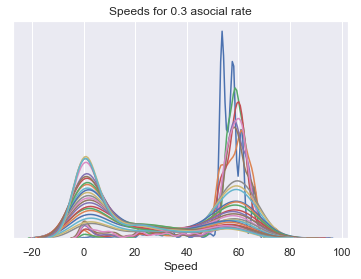

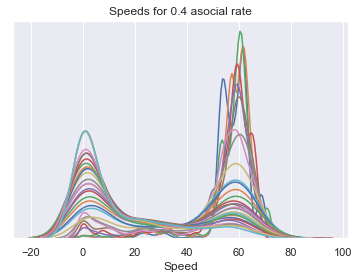

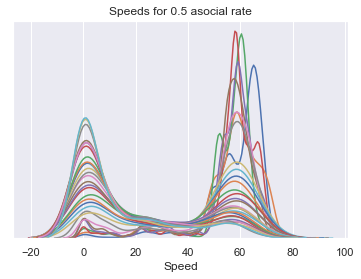

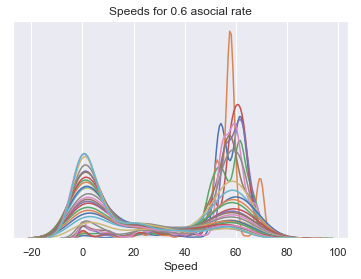

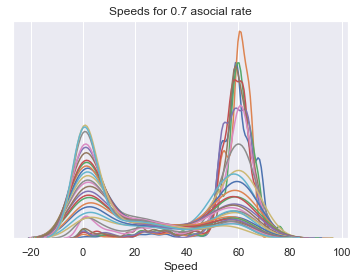

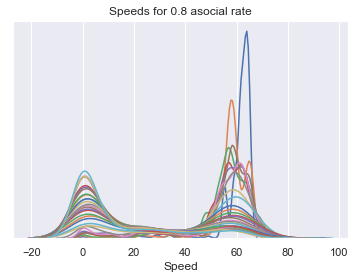

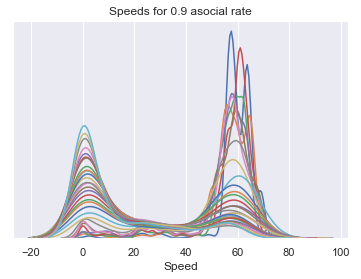

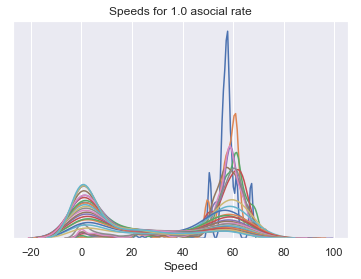

In [4]:
for value in asocial_values:
    for density in roaddensities:
        sns.distplot(speeds[density][value]['Speed'], hist = False)
    
    plt.title("Speeds for %s asocial rate" % (value))    
    plt.yticks([])
    
    plt.show()

Plot "slowed down" ratio to see how many cars are affected 

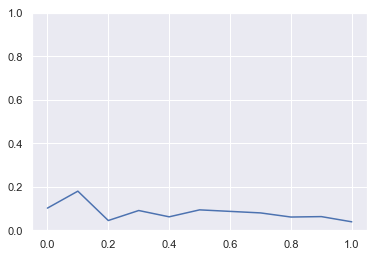

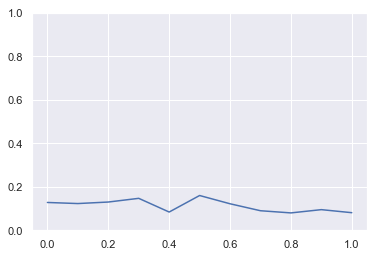

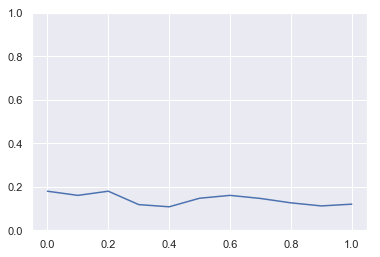

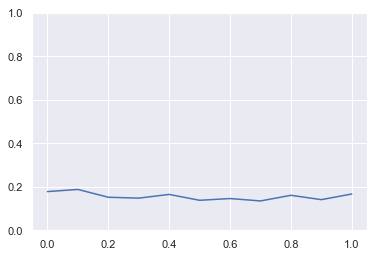

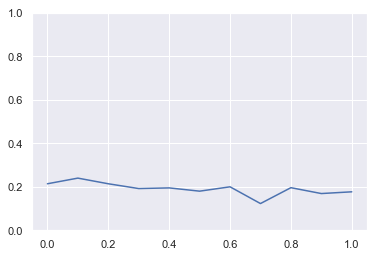

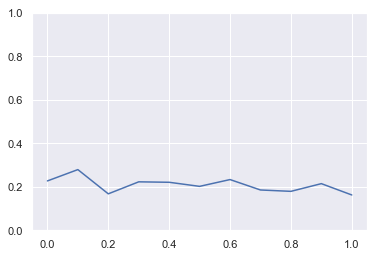

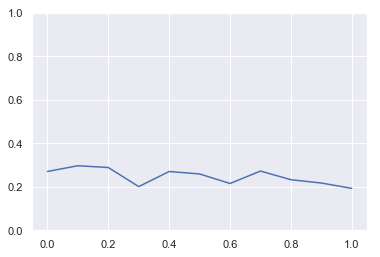

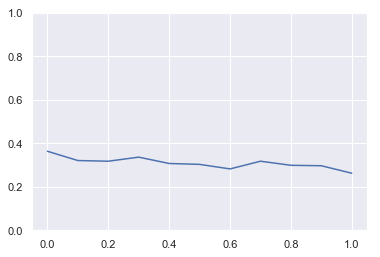

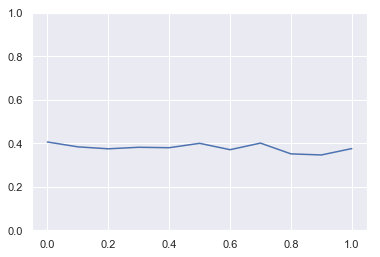

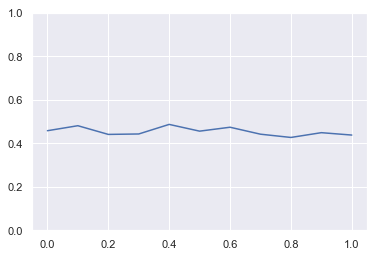

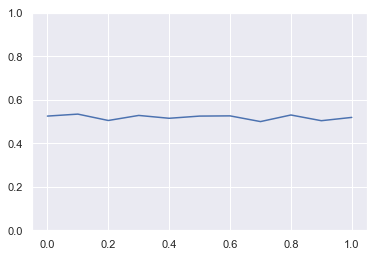

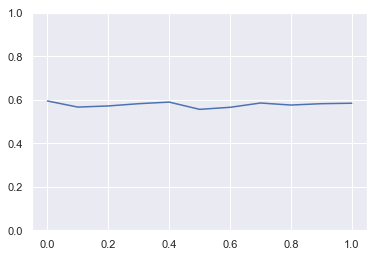

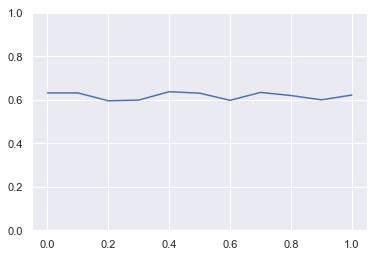

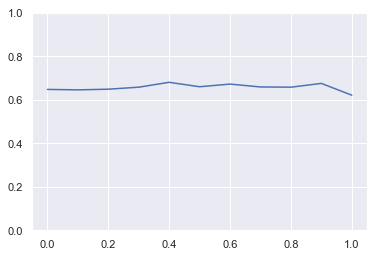

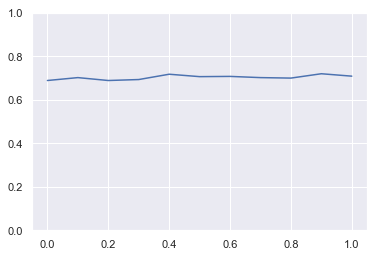

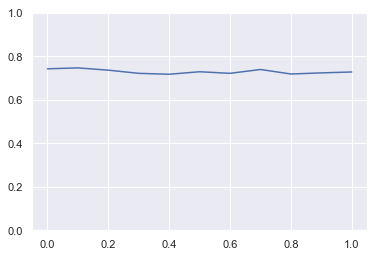

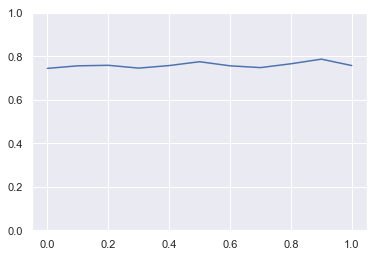

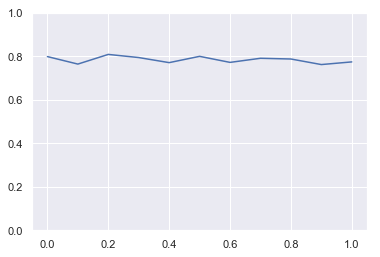

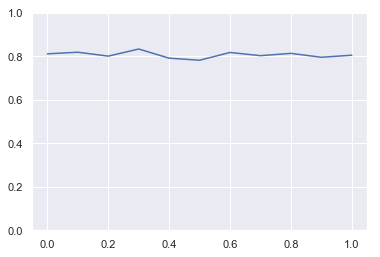

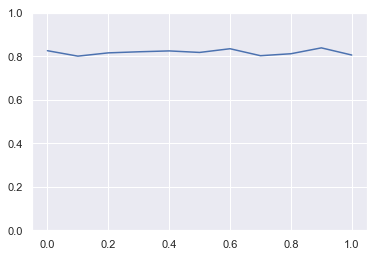

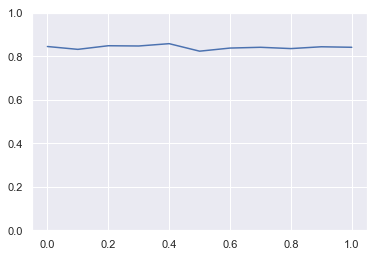

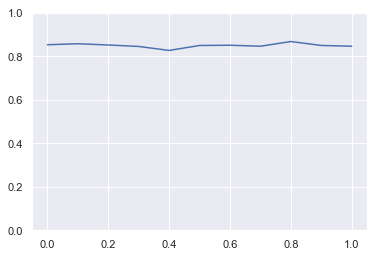

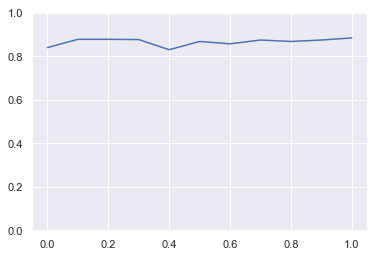

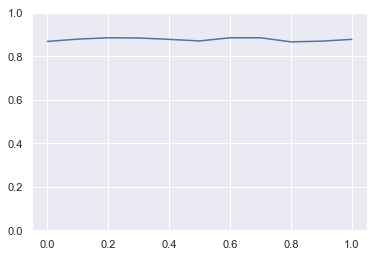

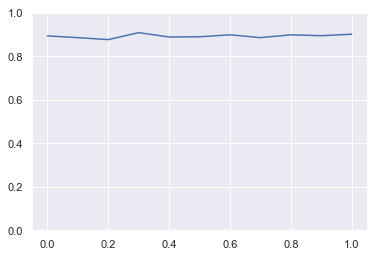

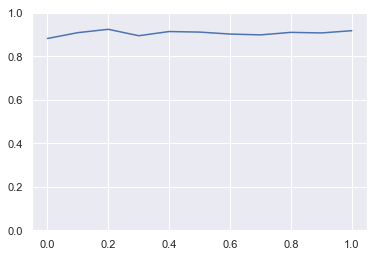

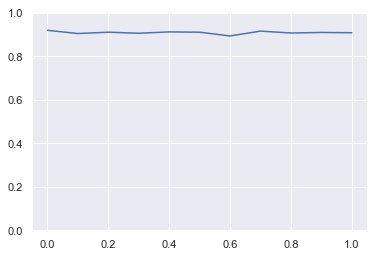

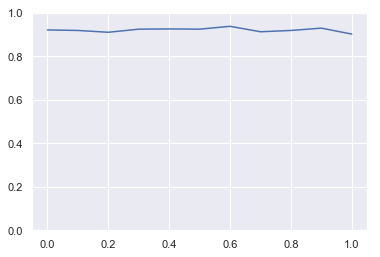

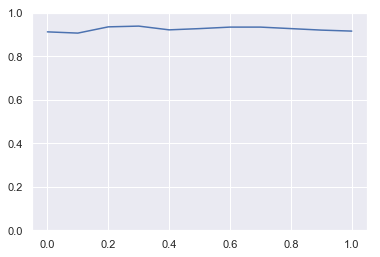

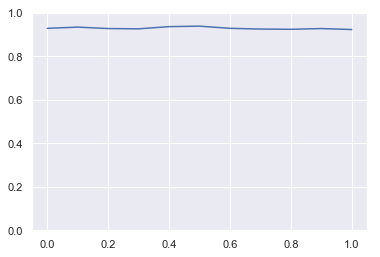

In [12]:
for density in roaddensities:
    slowedratio = []
    for value in asocial_values:  
        # count rows for which Slowed = True
        slowed = speeds[density][value][speeds[density][value].Slowed]["Slowed"].count()
        # only get rows for which Slowed = False
        notslowed = speeds[density][value][~speeds[density][value].Slowed]["Slowed"].count()
        
        slowedratio.append(slowed / (slowed + notslowed))
    
    sns.lineplot(x = asocial_values, y = slowedratio)
    plt.ylim(ymin = 0, ymax = 1)
    plt.show()

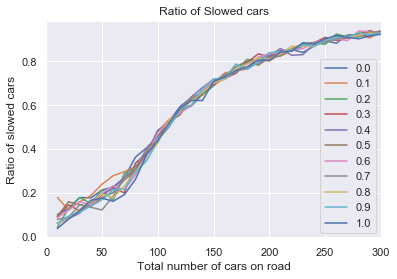

In [28]:
for value in asocial_values:  
    slowedratio = []
    for density in roaddensities:
        # count rows for which Slowed = True
        slowed = speeds[density][value][speeds[density][value].Slowed]["Slowed"].count()
        # only get rows for which Slowed = False
        notslowed = speeds[density][value][~speeds[density][value].Slowed]["Slowed"].count()
        
        slowedratio.append(slowed / (slowed + notslowed))
    
    sns.lineplot(x = roaddensities, y = slowedratio, label = "%s" % (value))
plt.title("Ratio of Slowed cars")
plt.xlabel("Total number of cars on road")
plt.ylabel("Ratio of slowed cars")
#plt.ylim(ymin = 0, ymax = 1.1)
plt.xlim(xmin = 0, xmax = 300)

plt.savefig("plots\slowedcars%s" % (saveext))
plt.show()